In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [3]:
x.shape, y.shape

((387, 5), (387, 1))

In [4]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

In [5]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

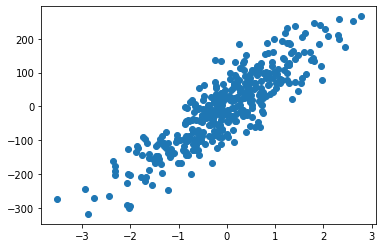

In [6]:
plt.scatter(x[1], y)

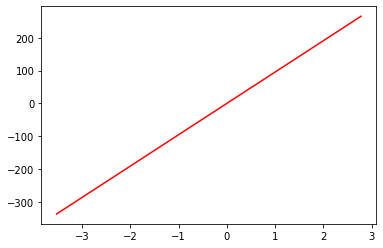

In [7]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [8]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

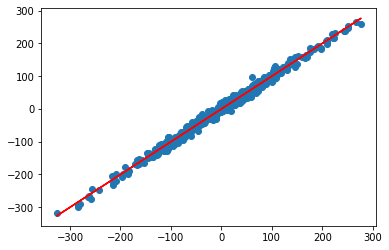

In [9]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

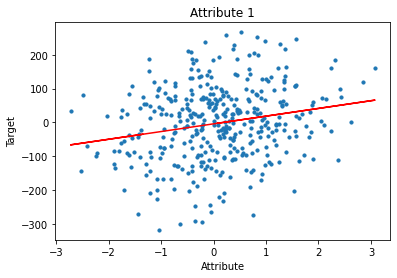

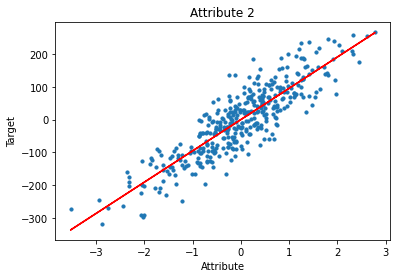

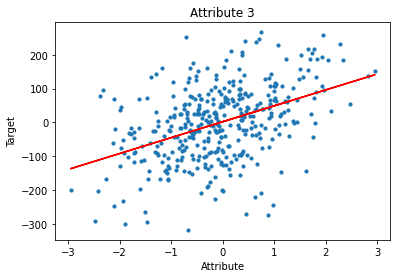

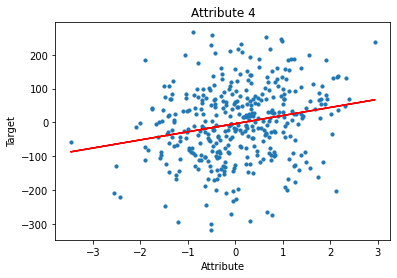

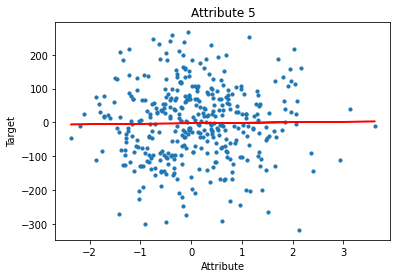

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# создание модели линейной регрессии
model = LinearRegression()

# построение парных регрессий
for i in range(x.shape[1]):
    # выбор одного атрибута
    x_i = x.iloc[:, i:i+1]
    
    # подгонка модели к данным
    model.fit(x_i, y)
    
    # предсказание целевой переменной для выбранного атрибута
    y_pred = model.predict(x_i)
    
    # визуализация парной регрессии
    plt.scatter(x_i, y, s=10)
    plt.plot(x_i, y_pred, color='r')
    plt.title(f"Attribute {i+1}")
    plt.xlabel("Attribute")
    plt.ylabel("Target")
    plt.show()


1 Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

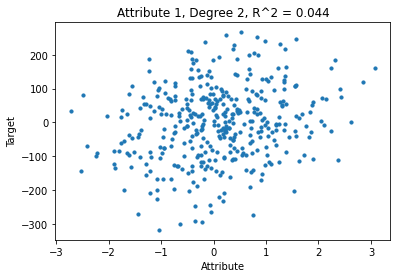

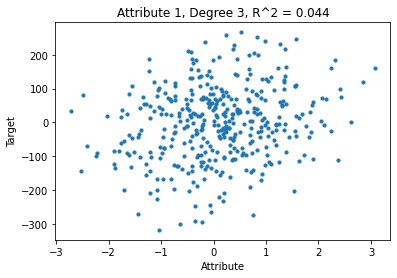

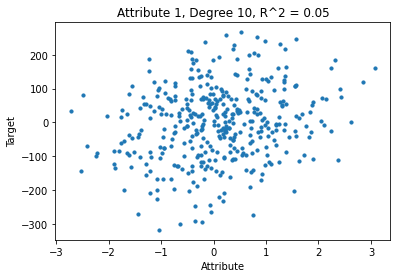

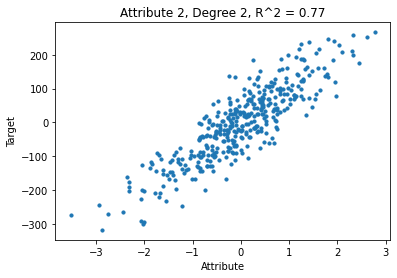

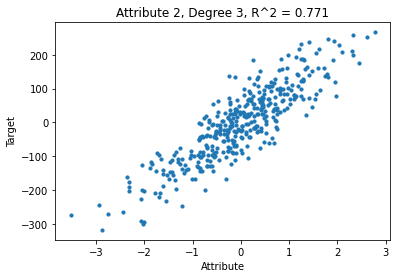

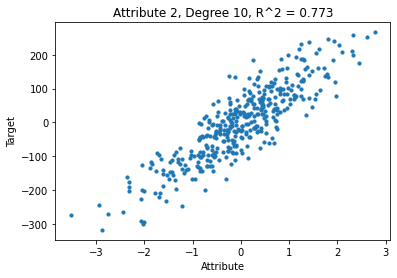

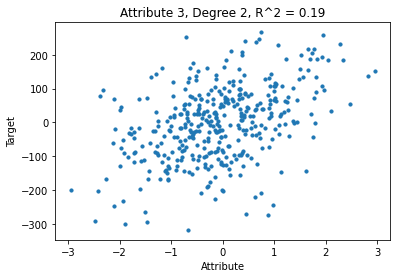

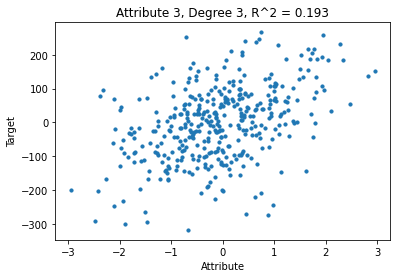

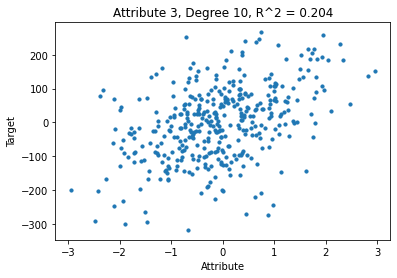

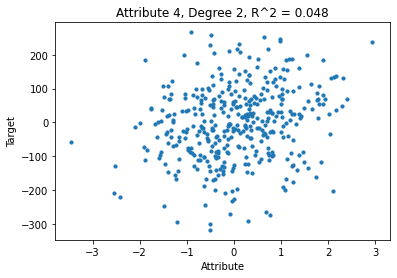

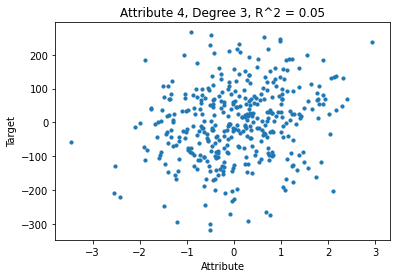

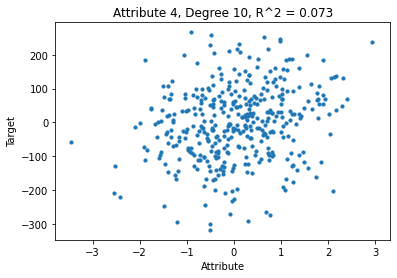

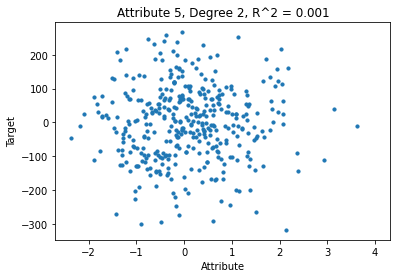

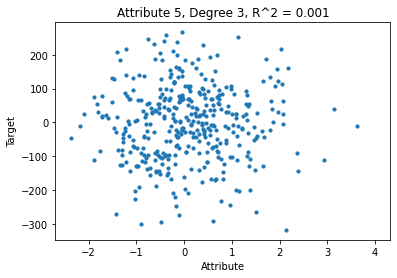

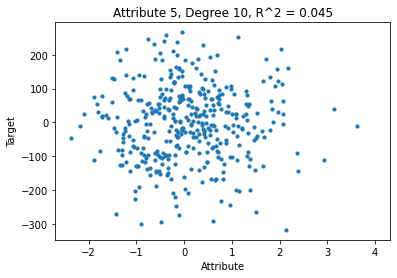

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import operator
# создание модели линейной регрессии
model = LinearRegression()

# степени полинома
degrees = [2, 3, 10]

# построение полиномиальных регрессий
for i in range(x.shape[1]):
    for degree in degrees:
        # выбор одного атрибута
        x_i = x.iloc[:, i:i+1]
        
        # создание объекта PolynomialFeatures и преобразование данных
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        x_poly = poly_features.fit_transform(x_i)
        
        # подгонка модели линейной регрессии к данным
        model.fit(x_poly, y)
        
        # предсказание целевой переменной для выбранного атрибута
        y_pred = model.predict(x_poly)
        
        # вычисление коэффициента детерминации (R^2)
        r2_score = model.score(x_poly, y)
        
        # визуализация полиномиальной регрессии
        plt.scatter(x_i, y, s=10)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x_i, y_pred), key=sort_axis)
        x_i, y_pred = zip(*sorted_zip)
        plt.plot(x_i, y_pred, color='r')
        plt.title(f"Attribute {i+1}, Degree {degree}, R^2 = {round(r2_score, 3)}")
        plt.xlabel("Attribute")
        plt.ylabel("Target")
        plt.show()


2 Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [12]:
from sklearn.metrics import r2_score

degrees = [2, 3, 10]
results = []
for i in range(len(x.columns)):
    row = []
    for j in range(len(degrees)):
        poly = PolynomialFeatures(degrees[j])
        x_poly = poly.fit_transform(x.iloc[:, i:i+1])
        model = LinearRegression().fit(x_poly, y)
        y_pred = model.predict(x_poly)
        r2 = r2_score(y, y_pred)
        row.append(round(r2, 3))
    results.append(row)

results_df = pd.DataFrame(results, columns=['2nd degree', '3rd degree', '10th degree'], index=x.columns)
print(results_df)


   2nd degree  3rd degree  10th degree
0       0.044       0.044        0.050
1       0.770       0.771        0.773
2       0.190       0.193        0.204
3       0.048       0.050        0.073
4       0.001       0.001        0.045


3 Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [13]:
from sklearn.metrics import r2_score

# initialize an empty list to store R-squared values
r_squared_values = []

# loop through each attribute
for i in range(x.shape[1]):
    x_i = x.iloc[:, i:i+1]
    model.fit(x_i, y)
    y_pred = model.predict(x_i)
    r_squared = r2_score(y, y_pred)
    r_squared_values.append(r_squared)

# create a summary table
summary_table = pd.DataFrame({
    'Attribute': [f"Attribute {i+1}" for i in range(x.shape[1])],
    'R-squared': r_squared_values
})

print(summary_table)


     Attribute  R-squared
0  Attribute 1   0.043643
1  Attribute 2   0.769974
2  Attribute 3   0.187945
3  Attribute 4   0.047470
4  Attribute 5   0.000172


The output will be a table with two columns: "Attribute" and "R-squared". The "Attribute" column lists the attributes used in each model, and the "R-squared" column lists the corresponding R-squared values.

To determine which models are over-trained or under-trained, you can look at the R-squared values. A high R-squared value (close to 1) indicates that the model fits the data well, while a low R-squared value (close to 0) indicates that the model does not fit the data well.

If some models have high R-squared values while others have low R-squared values, it could indicate that some models are over-trained (fit too closely to the training data and are not able to generalize well to new data) while others are under-trained (do not fit the data well and may benefit from more training).

However, in the given code, as the same model is used for all attributes and only one attribute is used at a time for each model, it is not possible to make conclusions about over-training or under-training based on the R-squared values of individual models. Instead, a more complex analysis would be needed to determine if the overall model is over- or under-fitting the data.

4 Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# создание модели линейной регрессии
model = LinearRegression()

# подгонка модели к данным
model.fit(x, y)

# предсказание целевой переменной
y_pred = model.predict(x)

# вычисление MSE и R^2
mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)
mae = metrics.mean_absolute_error(y, y_pred)
ev = metrics.explained_variance_score(y, y_pred)
max_err = metrics.max_error(y, y_pred)

# вывод результатов
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"R-squared value (R^2): {r2:.2f}")
print(mae)
print(ev)
print(max_err)


Mean squared error (MSE): 93.49
R-squared value (R^2): 0.99
7.780683675008622
0.9922198026415868
38.00369305928465
